
<h1 id="Tutorial-1---How-do-hairpins-zip?">Tutorial 1 - How do hairpins <em>zip</em>?<a class="anchor-link" href="#Tutorial-1---How-do-hairpins-zip?">¶</a></h1><p>Beginning from an unbound strand, and ending with a hairpin secondary structure, which scenario is more likely?</p>
<h4 id="Scenario-1">Scenario 1<a class="anchor-link" href="#Scenario-1">¶</a></h4><p>The first base pairs form near the ends of the strands, and then <em>zip</em> towards the hairpin loop?</p>
<p><img src="zip-outside-in.png" width="400px"/></p>
<h4 id="Scenario-2">Scenario 2<a class="anchor-link" href="#Scenario-2">¶</a></h4><p>The first base pairs form near the hairpin loop, and then <em>zip</em> towards the ends of the strands?</p>
<p><img src="./zip-inside-out.png" width="400px"/></p>
<p>Let's find out the differences of these scenarios using <code>multistrand</code>.</p>
<p>We first need to import some objects and functions from the <code>multistrand</code> python library.</p>


In [1]:
from multistrand.objects import *
from multistrand.options import Options, Literals, EnergyType
from multistrand.system import *
import multistrand.utils.thermo as thermo


<p>We begin by specifying the experimental conditions.  In this case, we will assume a temperature of $25^\circ $C.</p>


In [2]:
TEMPERATURE=25
opt = Options(temperature=TEMPERATURE,dangles="Some")
opt.DNA23Metropolis()


<p>Just for illustration, let's try to calculate the $\Delta G$ of a simple hairpin structure.</p>


In [3]:
SEQUENCE = "GTTCGGGCAAAAGCCCGAAC"
STRUCTURE = '((((' + 12*'.' + '))))'
N = len(SEQUENCE)
c = Complex(strands=[Strand(name="hairpin", sequence=SEQUENCE)], structure=STRUCTURE)
calculate_energy([c], opt, EnergyType.complex)  # should be -1.1449...
# Note that `calculate_energy()` takes a *list* of complexes, and returns a tuple of energies.

(-1.449479284217312,)


<h2 id="Sanity-check-the-structure-energy-with-NUPACK">Sanity check the structure energy with <code>NUPACK</code><a class="anchor-link" href="#Sanity-check-the-structure-energy-with-NUPACK">¶</a></h2><p>Let's use the <code>thermo</code> wrapper to check this value.</p>


In [4]:
thermo.energy([SEQUENCE], STRUCTURE, celsius=TEMPERATURE, material="DNA")

-1.4494792842173156


<h2 id="Back-to-the-experiment">Back to the experiment<a class="anchor-link" href="#Back-to-the-experiment">¶</a></h2><p>Next we define a convenience function to pretty print secondary structures.</p>


In [5]:
def print_hp(s: str):
    e = calculate_energy(
        [Complex(strands=[Strand(name="hairpin", sequence=SEQUENCE)], structure=s)],
        opt, EnergyType.complex)[0]
    print(f'{s}  ({e:6.2f})')
    return e


<h4 id="Pathway-for-scenario-1">Pathway for scenario 1<a class="anchor-link" href="#Pathway-for-scenario-1">¶</a></h4><p>Recall that in scenario #1 the base pairs first form near the strand ends.</p>


In [6]:
steps = range(9)
path1 = [print_hp(f"{'('*i}{'.'*(N-2*i)}{')'*i}")
         for i in steps]

....................  (  0.00)
(..................)  (  3.61)
((................))  (  1.94)
(((..............)))  (  0.25)
((((............))))  ( -1.45)
(((((..........)))))  ( -4.14)
((((((........))))))  ( -6.22)
(((((((......)))))))  ( -8.58)
((((((((....))))))))  (-10.37)



<h4 id="Pathway-for-scenario-2">Pathway for scenario 2<a class="anchor-link" href="#Pathway-for-scenario-2">¶</a></h4><p>In scenario #2 the first base pairs form near the loop and the stem forms by zipping towards the strand ends.</p>


In [7]:
path2 = [print_hp(f"{'.'*((N-4)//2-i)}{'('*i}....{')'*i}{'.'*((N-4)//2-i)}")
         for i in steps]

....................  (  0.00)
.......(....).......  (  2.24)
......((....))......  ( -0.27)
.....(((....))).....  ( -2.35)
....((((....))))....  ( -3.95)
...(((((....)))))...  ( -7.51)
..((((((....))))))..  ( -7.50)
.(((((((....))))))).  ( -7.78)
((((((((....))))))))  (-10.37)



<h2 id="Plot-the-energy-of-the-folding-pathways">Plot the energy of the folding pathways<a class="anchor-link" href="#Plot-the-energy-of-the-folding-pathways">¶</a></h2><p>Note that both pathways lead to the same structure, which has the same free energy.  But how does the energy change while the stem is forming, and how are the two scenarios different?  We can plot the energy at each step of these two possible folding pathways, as they progress from an unfolded state to a completely folded state, to see how they differ.  Plotting is simple with the help of the <code>matplotlib</code> and <code>numpy</code> libraries.</p>


In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pyp

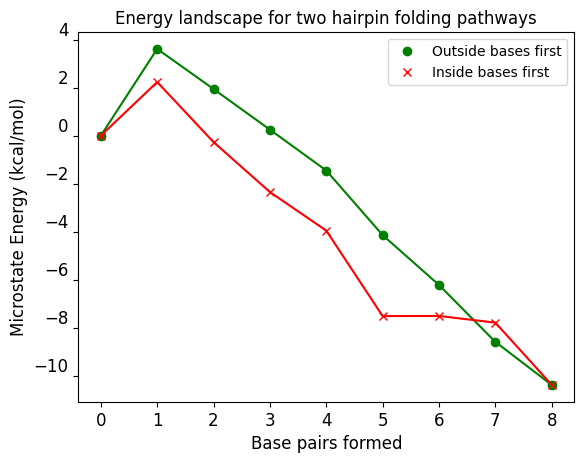

In [9]:
pyp.figure(1)
pyp.plot(steps,path1,'go', label='Outside bases first')
pyp.plot(steps,path1,'g-', label='_nolabel_')
pyp.plot(steps,path2,'rx', label='Inside bases first')
pyp.plot(steps,path2,'r-', label='_nolabel_')
pyp.title("Energy landscape for two hairpin folding pathways")
pyp.xlabel("Base pairs formed",fontsize='larger')
pyp.ylabel("Microstate Energy (kcal/mol)",fontsize='larger')
pyp.yticks(fontsize='larger',va='bottom')
pyp.xticks(fontsize='larger')
pyp.legend()
pyp.show()